线性回归模型：单层神经网络
$$y = w_1x_1 + w_2x_2 + w_3x_3 + b = \vec w \cdot \vec x + b$$
平方损失：$l = \frac 1 2(y - y_c)^2$  
总损失  
显示解


## 梯度下降  
$$w_t = w_{t-1} - \eta \frac{\partial l}{\partial w_{t-1}}$$
**学习率$\eta$**

#### 小批量随机梯度下降
随机采样b个样本，而不是整个训练集上梯度下降  
**批量大小$b$**

# 从0开始线性回归

In [207]:
%matplotlib inline    
#嵌入到里面
import random
import torch
from d2l import torch as d2l

In [208]:
def synthetic_data(w, b, num):
    x = torch.normal(0, 1, (num, len(w)))  #len(w)
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)    #shape no ()
    return x, y.reshape((-1, 1))
true_w = torch.tensor([5, -1.0])
true_b = 2.0
num = 1000
features, labels = synthetic_data(true_w, true_b, num)


tensor([[-1.1831,  0.9412],
        [ 0.3180,  0.6598],
        [ 0.2286,  2.1611],
        [ 1.2539,  0.9469],
        [-0.0884, -1.1728],
        [-0.8176, -0.5591],
        [ 0.7520, -1.6506],
        [-1.5551,  0.9475],
        [-0.3632, -1.8716],
        [ 0.4844, -1.9873]])
tensor([[-4.8463],
        [ 2.9318],
        [ 0.9927],
        [ 7.3135],
        [ 2.7091],
        [-1.5191],
        [ 7.3986],
        [-6.7269],
        [ 2.0644],
        [ 6.4156]])


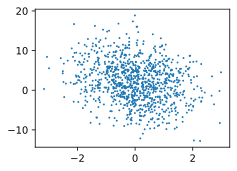

In [209]:
print(features[:10], labels[:10], sep = '\n')
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);


In [210]:
def iter_data(batch_size, features, labels):
    size = len(labels)
    indices = list(range(size))
    random.shuffle(indices)
    for i in range(0, size, batch_size):
        batch_indices = indices[i:min(i+batch_size, size)]
        yield features[batch_indices], labels[batch_indices]    #放在里面！！！！


In [211]:
batch_size = 10

for x, y in iter_data(batch_size, features, labels):
    print(x, y)
    break

tensor([[ 1.0241,  1.8488],
        [-1.2274, -0.3760],
        [ 0.6983,  0.4805],
        [-0.5760, -0.6196],
        [ 1.5421, -1.7470],
        [-1.8992, -0.1572],
        [ 0.2810,  0.1140],
        [-1.6346,  0.1610],
        [ 0.0049, -0.7348],
        [-0.5720, -1.7211]]) tensor([[ 5.2775],
        [-3.7697],
        [ 5.0294],
        [-0.2528],
        [11.4465],
        [-7.3398],
        [ 3.3051],
        [-6.3342],
        [ 2.7391],
        [ 0.8464]])


In [212]:
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

In [213]:
def lin_net(x, w, b):
    return torch.matmul(x, w) + b

In [214]:
def sq_loss(y, true_y):
    return ((y - true_y.reshape(y.shape)) ** 2).sum() / 2

In [215]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr / batch_size
            param.grad.zero_()

In [216]:
lr = 0.1
epochs = 3
net = lin_net
loss = sq_loss
batch_size = 10

def train(features, labels, epoch, lr, net):
    for epoch in range(epochs):
        for x, true_y in iter_data(batch_size, features, labels):
            y = net(x, w, b)
            l = loss(y, true_y)
            l.backward()
            sgd([w, b], lr, batch_size)
        with torch.no_grad():
            epoch_loss = loss(net(features, w, b), labels) / len(labels)
            print(f'epoch {epoch}: loss = {epoch_loss}')

train(features, labels, epochs, lr, net)

epoch 0: loss = 5.098309338791296e-05
epoch 1: loss = 5.340088318916969e-05
epoch 2: loss = 5.096799577586353e-05


In [217]:
x = torch.normal(0, 1, (1, 2))
y = net(x, w, b)
true_y = net(x, true_w, true_b)
print(x, y, true_y, sep='\n')

tensor([[0.9564, 0.8626]])
tensor([[5.9193]], grad_fn=<AddBackward0>)
tensor([5.9196])
